In [9]:
from crystalbuilder import *
import crystalbuilder.geometry as geo
import matplotlib.pyplot as plt
import numpy as np
import vedo

In [10]:
a1 = [1, 0, 0]
a2 = [0, 1 ,0]
a3 = [0, 0, 1]

a_mag = 1


geo_lattice = lattice.Lattice(a1, a2, a3, magnitude = [a_mag, a_mag, a_mag])

In [32]:
origin = (0,0,0)
vertex_1 = (.5, .5, .5)
vertex_2 = (-.5, -.5, .5)
vertex_3 = (.5, -.5, -.5)
vertex_4 = (-.5, .5, -.5)

rad = .17

cylinder_1 = geo.Cylinder.from_vertices([origin, vertex_1], radius=rad)
cylinder_2 = geo.Cylinder.from_vertices([origin, vertex_2], radius=rad)
cylinder_3 = geo.Cylinder.from_vertices([origin, vertex_3], radius=rad)
cylinder_4 = geo.Cylinder.from_vertices([origin, vertex_4], radius=rad)

unit_cell = [cylinder_1, cylinder_2, cylinder_3, cylinder_4]

In [33]:
a1_reps = 5
a2_reps = 5
a3_reps = 5
crystal = geo_lattice.tile_geogeometry(unit_cell, a1_reps, a2_reps, a3_reps )


In [13]:
scene = viewer.visualize(crystal)
scene.show().close()

In [34]:
import meep as mp
from meep import mpb

material = mp.Medium(epsilon=8)

mpb_lattice = convert.to_mpb_lattice(geo_lattice)
mpb_geometry = convert.geo_to_mpb(unit_cell, material=material, lattice=mpb_lattice)

In [37]:
vlist = [
    mp.Vector3(0, 0.5, 0),        # X
    mp.Vector3(.5, 0.5, .5),          # R
    mp.Vector3(0, 0, 0),            # Gamma
    mp.Vector3(0.5, 0.5, 0),        # M
    mp.Vector3(.5, 0, 0),    # X
    mp.Vector3(0.5, 0.5, 0.5), # R
    mp.Vector3(0.5, 0.0, .5) # M1

]
k_corners = len(vlist)
k_points = mp.interpolate(5, vlist)
tick_labs = ['X', 'R', r'$\Gamma$','M', 'X', r'$M_1$', 'R']


resolution = 16  # use a 16x16x16 grid
mesh_size = 1
num_bands = 10

ms = mpb.ModeSolver(
    geometry_lattice=mpb_lattice,
    k_points=k_points,
    geometry=mpb_geometry,
    resolution=resolution,
    num_bands=num_bands,
    mesh_size=mesh_size
)

ms.run()

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 16 x 16 x 16.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 1.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0.25,0.25,0.25)
          radius 0.17, height 0.866025, axis (0.57735, 0.57735, 0.57735)
     cylinder, center = (-0.25,-0.25,0.25)
          radius 0.17, height 0.866025, axis (-0.57735, -0.57735, 0.57735)
     cylinder, center = (0.25,-0.25,-0.25)
          radius 0.17, height 0.866025, axis (0.57735, -0.57735, -0.57735)
     cylinder, center = (-0.25,0.25,-0.25)
          radius 0.17, height 0.866025, axis (-0.57735, 0.57735, -0.57735)
Geometric object tree has depth 4 and 63 object nodes (vs. 4 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polari

epsilon: 1-8, mean 2.84756, harm. mean 1.39242, 37.6953% > 1, 26.3937% "fill"
real part range: 1 .. 8


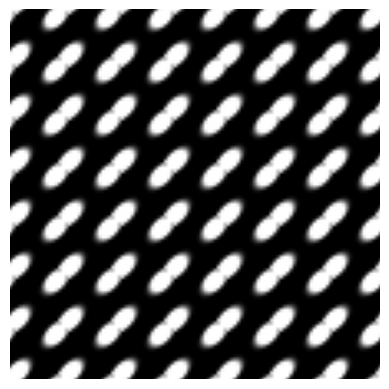

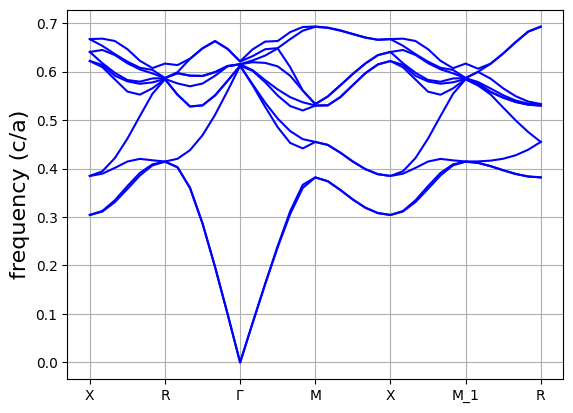

In [36]:
### Plotting Dielectric Map ###
plt.figure()
md = mpb.MPBData(rectify=True, periods=7, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
layer_slice = 9
plt.imshow(converted_eps[:,:, layer_slice], interpolation='spline36', cmap='binary_r')
plt.axis('off')
plt.show()

### Plotting Band Structure ###
crysfreqs = ms.all_freqs
x = range(len(crysfreqs))
figgy = plt.figure()
plt.plot(x,crysfreqs, color='blue');
points_in_between = (len(crysfreqs)-1) / (k_corners-1)
tick_locs = [i*points_in_between for i in range(k_corners)]

plt.xticks(tick_locs,tick_labs)
plt.ylabel('frequency (c/a)', size=16)
plt.grid(True)
figax = plt.gca()

plt.show()
